### Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model to classify the data points into given labels. 

Dataset Link:
The data consist of evaluations of teaching performance over three regular semesters and two summer semesters of 
151 teaching assistant (TA) assignments at the Statistics Department of the University of Wisconsin-Madison. The scores were
divided into 3 roughly equal-sized categories ("low", "medium", and "high") to form the class variable.

### Attribute Information:
1. Whether of not the TA is a native English speaker (binary); 1=English speaker, 2=non-English speaker
2. Course instructor (categorical, 25 categories)
3. Course (categorical, 26 categories)
4. Summer or regular semester (binary) 1=Summer, 2=Regular
5. Class size (numerical)
6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

### CASE

1)Model Comparison Report

Create a report stating the performance of multiple models on this data and suggest the best model for production.

2)Report on Challenges faced

Create a report which should include challenges you faced on data and what technique used with proper reason.


Note:-All above task has been created on single jupyter notebook and share the same while final submission of project.


### The objective of this project is:

To perform exploratory data analysis (EDA) on Teaching Assistance (TA) evaluation data and Understand factors affecting performance.

To build and compare multiple machine learning models that predict TA performance(Low / Medium / High).

To recommend the best-performing model for prediction.

To document challenges faced and solutions applied.

### Understand the Problem Statement

Goal: Predict teaching performance of TAs as Low, Medium, or High

Type of problem: Multi-class classification

Domain: Education  

It helps us to choose correct models and metrics.

### Understand the Dataset

Total records: 151

Total features: 5 input + 1 target

### Data types:

Binary (Native speaker, Semester)

Categorical (Instructor, Course)

Numerical (Class size) 

It determines preprocessing techniques.

### Traget Varaible -- Class attribute

1)It represents classes:
    1-Low, 
    2-Medium, 
    3-High

2)The target variable is categorical (ordinal) in nature, representing three performance levels: Low, Medium, and High. Although encoded numerically, it is treated as a multi-class classification problem.

3)This is a classification problem, not regression.


### Load the Dataset

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

C:\Users\renuh\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv(r"C:\Users\renuh\Downloads\DataMites Internship\PRCP-1026-TeachingAssistance\Teaching Assistance\tae.csv")
data

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


### Initial Data checks

In [3]:
# Call the dataframe and do basic checks
data.shape

(151, 6)

--> The data consist of evaluations of teaching performance over three regular semesters and two summer semesters of 
151 teaching assistant(TA) assignments at the Statistics Department of the University of Wisconsin-Madison.

--> The scores were divided into 3 roughly equal-sized categories("low", "medium", and "high") to form the class variable.

--> Number of Instances: 151

--> Number of Attributes: 6 (including the class attribute)


Attribute information :
    
1. Whether of not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
    
2. Course instructor (categorical, 25 categories)

3. Course (categorical, 26 categories)

4. Summer or regular semester (binary) 1=Summer, 2=Regular

5. Class size (numerical)

6. Class attribute (categorical) 1=Low, 2=Medium, 3=High




### Domain Analysis of TA

Domain Analysis

The given dataset contains evaluations of teaching performance for 151 teaching assistant (TA) assignments at the Statistics 
Department of the University of Wisconsin-Madison. The dataset includes various attributes that can provide insights into the 
factors affecting the performance of the TAs.

Native_teacher: 
        This attribute indicates whether the TA is a native English speaker or not. It is a binary variable with values 1 and 2,
        representing English speakers and non-English speakers, respectively. The language proficiency of TAs may play a role
        in their teaching effectiveness, as it can affect their communication with students.

Instructor: 
        This attribute represents the course instructor and is a categorical variable with 25 categories. Different instructors
        may have different teaching styles, approaches, and expertise, which can influence the overall teaching performance of
        TAs.

Course: 
        This attribute represents the course being taught and is a categorical variable with 26 categories. The nature of the
        course, its difficulty level, and the subject matter can impact the teaching experience and performance of TAs.

Semester: 
        This attribute indicates whether the TA taught classes during the summer or regular semesters. It is a binary variable 
        with values 1 and 2, representing summer and regular semesters, respectively. The teaching environment and dynamics may
        vary between these two semesters, which could influence the TA's performance.

Class size:
        This attribute represents the number of participants who joined the TA session. It is a numerical variable that can 
        provide insights into the scale and complexity of the teaching environment. Larger class sizes may pose different 
        challenges and require different teaching strategies compared to smaller class sizes.

Class attribute: 
        This attribute is the target variable and represents the evaluation scores divided into three categories: low, medium, 
        and high. It is a categorical variable with values 1, 2, and 3, respectively. The class attribute indicates the overall 
        performance of TAs based on the evaluations.

By analyzing these attributes, we can explore the relationships between various factors and the teaching performance of TAs.
This analysis can help identify patterns, trends, and potential predictors of performance, which can be utilized to build a 
predictive model accurately forecasting the performance of future TAs.

In [4]:
data.head() # display top five rows

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [5]:
data.tail() # display bottom five rows

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


In [6]:
data.info() # No missing values in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Native_teacher   151 non-null    int64
 1   Instructor       151 non-null    int64
 2   Course           151 non-null    int64
 3   Semester         151 non-null    int64
 4   Class_size       151 non-null    int64
 5   Class_attribute  151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [7]:
data.describe()

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


The statistical summary indicates that the dataset contains 151 complete records with no missing values. 
Most teaching assistants are non-native English speakers, and the majority of classes were conducted during regular semesters.
Class size shows significant variability, ranging from very small to large classes, which may influence performance outcomes.
The target variable is centered around the medium performance category, indicating a reasonably balanced class distribution 
suitable for classification modeling.

In [8]:
data.isnull().sum() # No missing values in the data. dataset is ready for data analysis

Native_teacher     0
Instructor         0
Course             0
Semester           0
Class_size         0
Class_attribute    0
dtype: int64

In [9]:
data.isnull()

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False
149,False,False,False,False,False,False


In [10]:
data.dtypes

Native_teacher     int64
Instructor         int64
Course             int64
Semester           int64
Class_size         int64
Class_attribute    int64
dtype: object

## TASK-1 Exploratory Data Analysis

In [11]:
data.head()

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


### Here we have 5 features and one target 

1)Features are 
    Native_teacher     
    Instructor         
    Course             
    Semester           
    Class_size  
    

2)Target is class_attribute

In [12]:
data.columns

Index(['Native_teacher', 'Instructor', 'Course', 'Semester', 'Class_size',
       'Class_attribute'],
      dtype='object')

### Step 1 Univariate Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

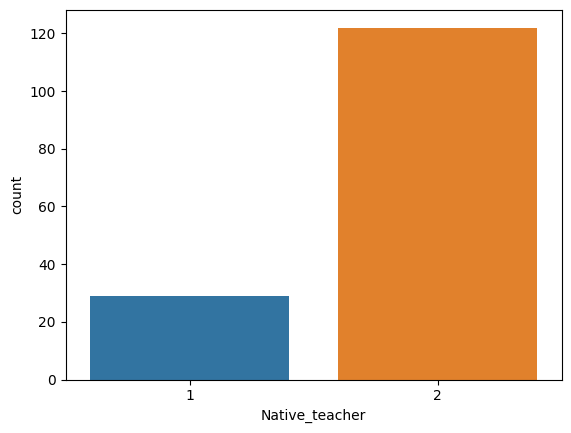

In [14]:
sns.countplot(x='Native_teacher',data=data)
plt.show()                                #the number of english speakers are less than the number of non english speakers

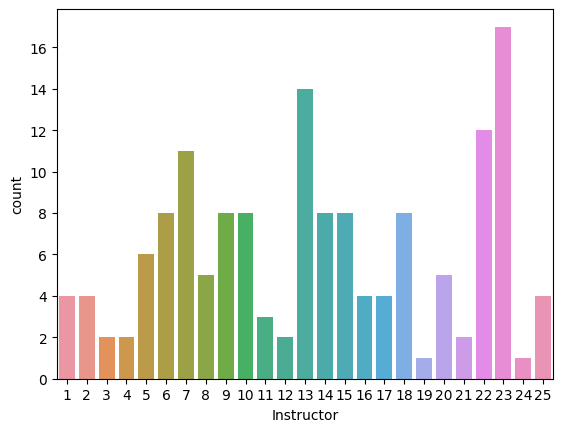

In [15]:
sns.countplot(x='Instructor',data=data)
plt.show()

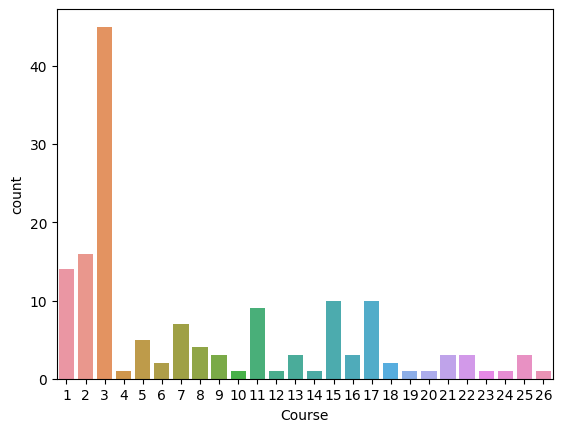

In [16]:
sns.countplot(x='Course',data=data)
plt.show()

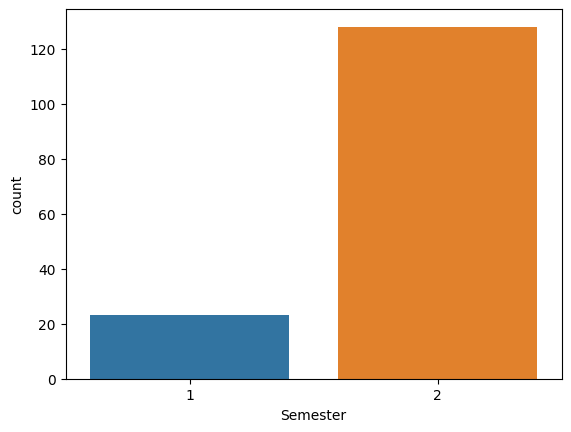

In [17]:
sns.countplot(x='Semester',data=data)
plt.show()     # here regular semster have more count than summer semster

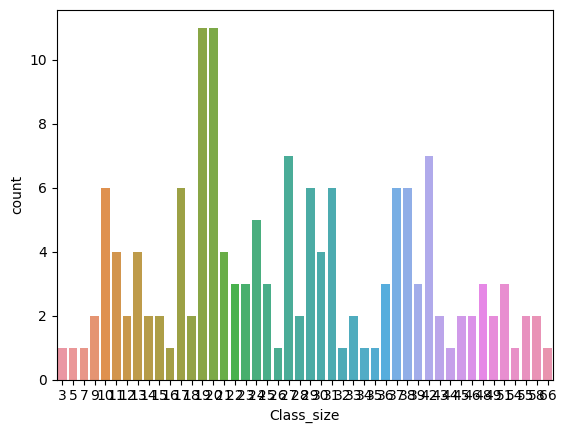

In [18]:
sns.countplot(x='Class_size',data=data)
plt.show()

### Understand the Target Variable

In [19]:
data['Class_attribute'].value_counts()

Class_attribute
3    52
2    50
1    49
Name: count, dtype: int64

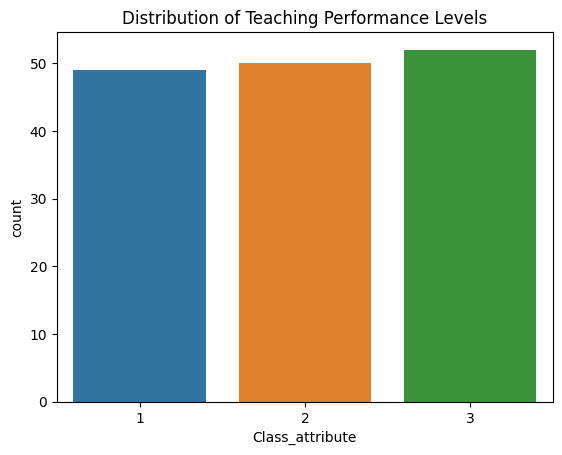

In [20]:
sns.countplot(x='Class_attribute',data=data) # target variable distribution
plt.title("Distribution of Teaching Performance Levels")
plt.show() #Target classes are roughly balanced.

### Step-2 Bivariate Analysis refers to plots between input variables and target variable.


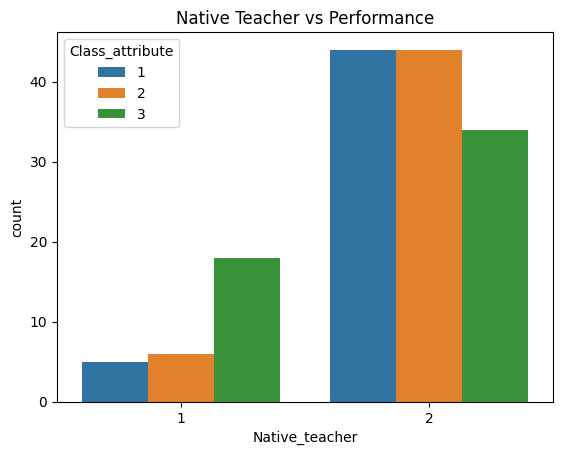

In [21]:
## Analyzing how Native_teacher impact the performance of teaching with class_attribute

sns.countplot(x='Native_teacher', hue='Class_attribute', data=data)
plt.title("Native Teacher vs Performance")
plt.show()

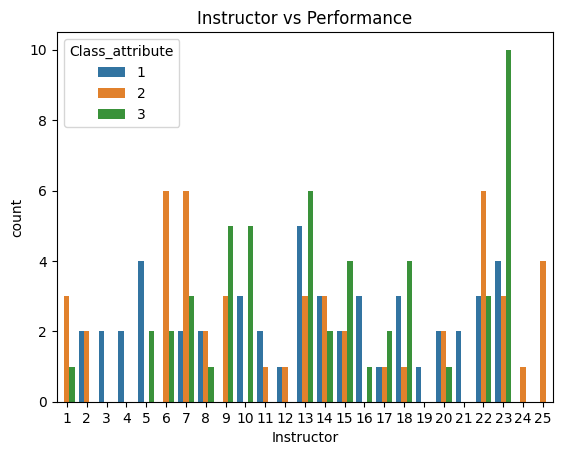

In [22]:
sns.countplot(x='Instructor', hue='Class_attribute', data=data)
plt.title("Instructor vs Performance")
plt.show()

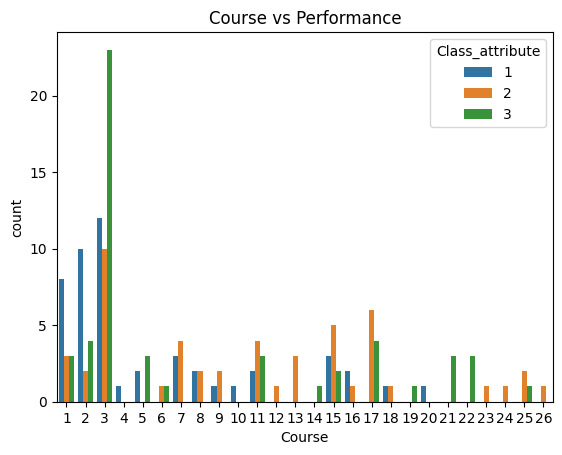

In [23]:
sns.countplot(x='Course', hue='Class_attribute', data=data)
plt.title("Course vs Performance")
plt.show()

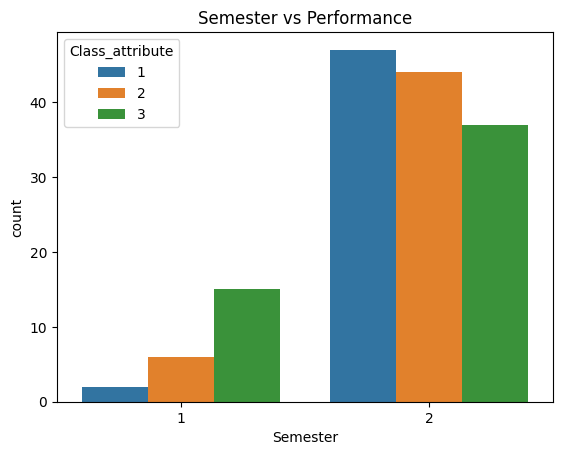

In [24]:
sns.countplot(x='Semester', hue='Class_attribute', data=data)
plt.title("Semester vs Performance")
plt.show()

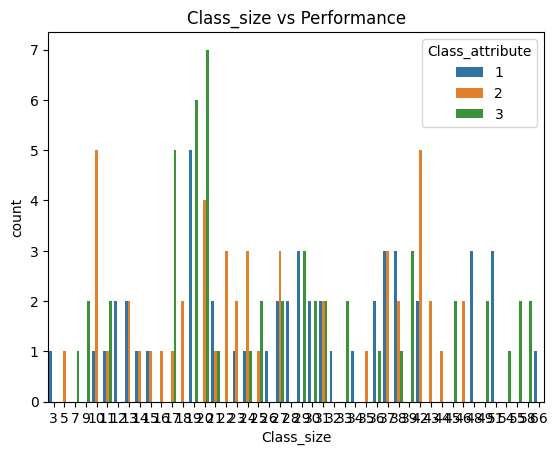

In [25]:
sns.countplot(x='Class_size', hue='Class_attribute', data=data)
plt.title("Class_size vs Performance")
plt.show()

In [26]:
data1 = data[['Native_teacher', 'Instructor', 'Course', 'Semester', 'Class_size']]
data1

,Native_teacher,Instructor,Course,Semester,Class_size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
...,...,...,...,...,...
146,2,3,2,2,26
147,2,10,3,2,12
148,1,18,7,2,48
149,2,22,1,2,51


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

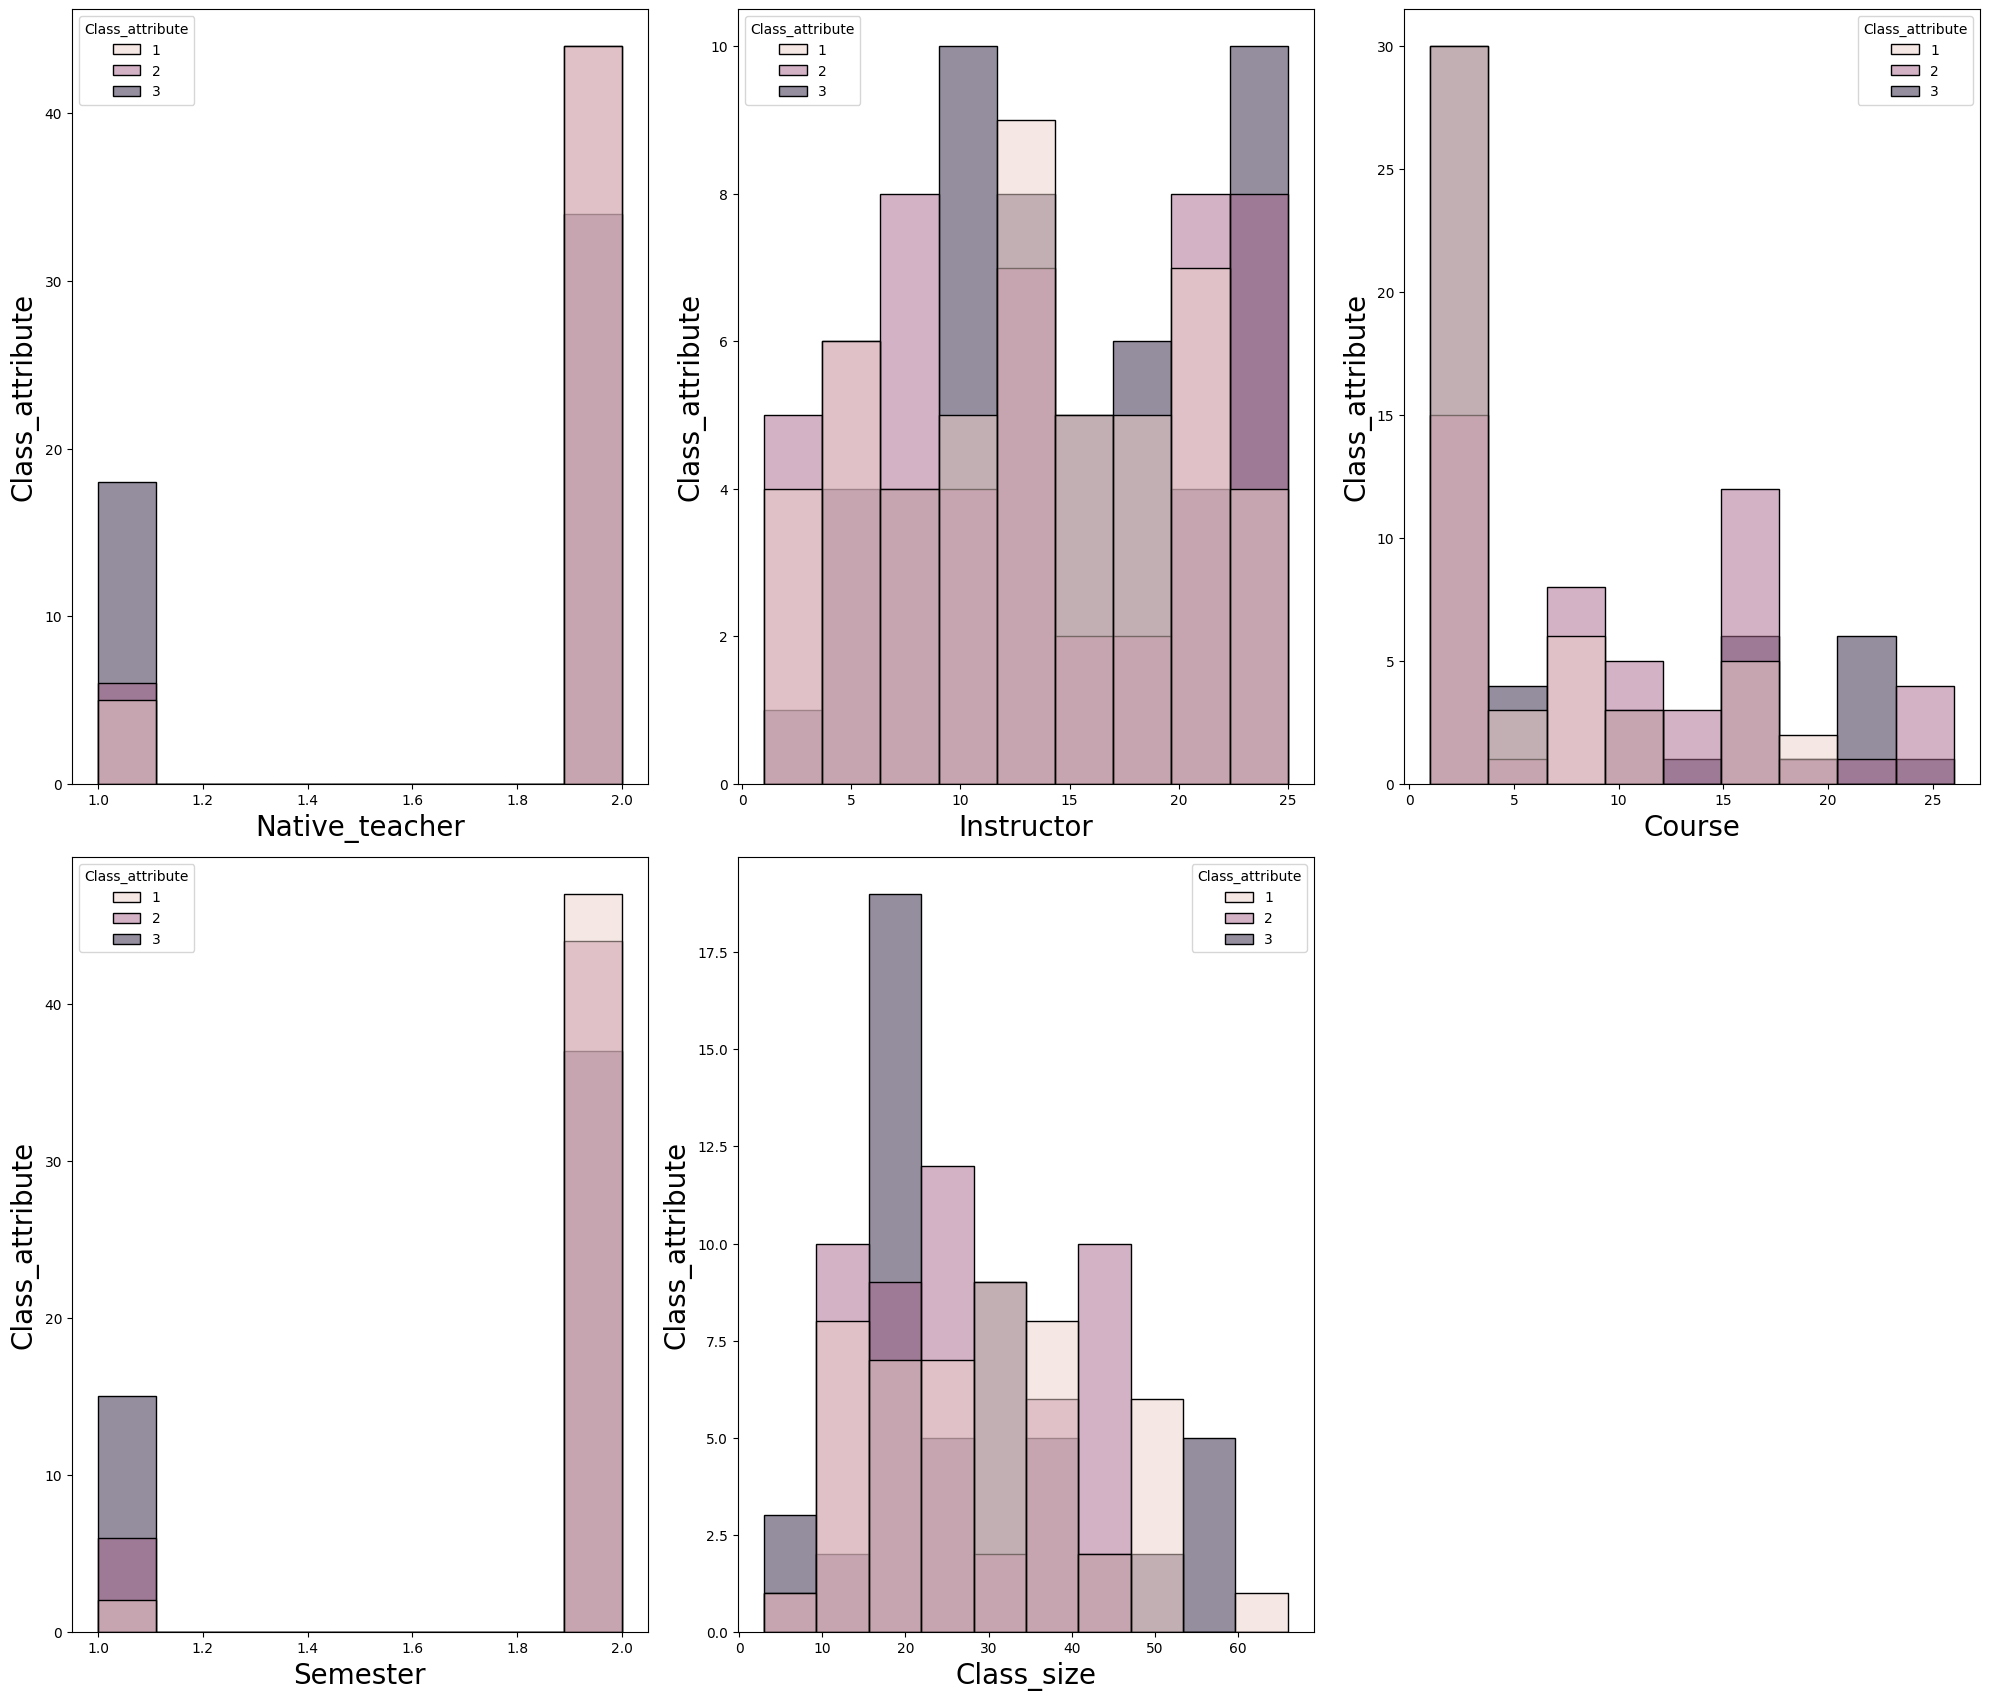

In [27]:
plt.figure(figsize=(20,25),facecolor='white') #  backgroud size .it decides the size of chart
plotnumber=1  # intial value for variable

for column in data1:  # to get the name of the column one by one 
    if plotnumber<=9: # condition
        ax=plt.subplot(3,3,plotnumber)  # it tells jupyter notebook how many charts should be side by side
        sns.histplot(x=data[column]
                        ,hue=data.Class_attribute)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Class_attribute',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Native_teacher:
    The analysis shows that non-native English teachers appear more frequently in the dataset overall.However, high-performance
    classes are more commonly associated with native English teachers, while non-native teachers are largely concentrated in low and medium performance categories. This indicates that native language proficiency has 
    a noticeable impact on teaching effectiveness and student performance.

Instructor:
    Performance varies significantly across different instructors. Some instructors consistently achieve higher performance 
    ratings, while others are associated more with low or medium performance. No single instructor dominates all performance 
    categories, suggesting that instructor influence is categorical and non-linear rather than directly measurable through
    numeric correlation.

Course:
    Certain courses show a higher frequency of high-performance outcomes, while others are more often associated with low
    performance. This suggests that course content, structure, or difficulty level plays an important role in determining 
    student performance.

Semester:
    Regular semesters dominate across all performance categories, with high performance appearing slightly more frequently 
    during regular semesters compared to summer sessions. This suggests that regular semesters provide a more stable and 
    structured learning environment, positively influencing performance.

Class_size:
    High performance is mostly observed in small to medium-sized classes, whereas low performance is more common in 
    larger classes. Very large classes rarely achieve high performance, indicating that smaller class sizes allow better 
    interaction and contribute positively to student outcomes.


### Step-3 Multivariate Analysizing

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

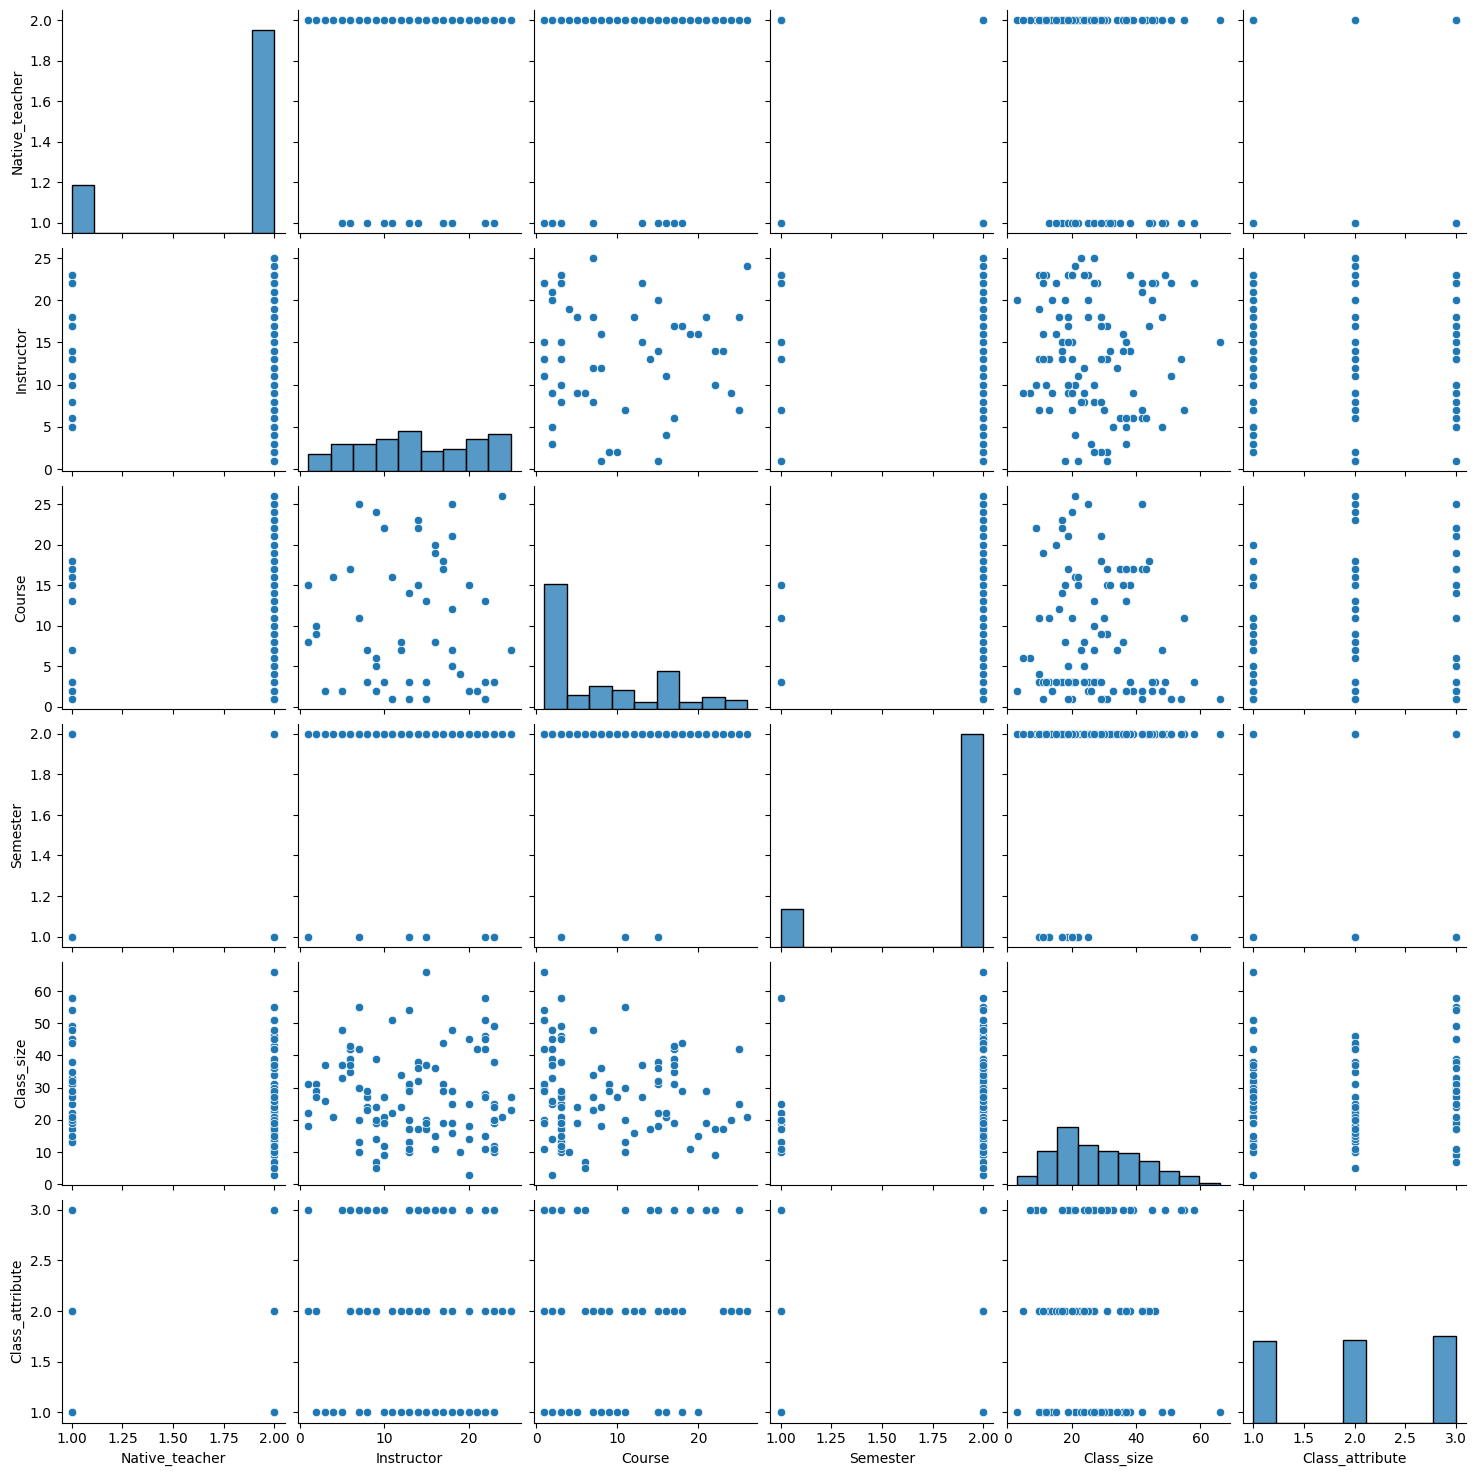

In [28]:
sns.pairplot(data)
plt.show()

# Data Preprocessing and Feature Engineering

In [29]:
# Step 1-Finding missing values
data.isnull().sum()

Native_teacher     0
Instructor         0
Course             0
Semester           0
Class_size         0
Class_attribute    0
dtype: int64

In [30]:
#Step 2- Converting categorical data to numerical
# in our present dataset no categorical data present

### Checking for outliers

In [31]:
column = data.columns
column

Index(['Native_teacher', 'Instructor', 'Course', 'Semester', 'Class_size',
       'Class_attribute'],
      dtype='object')

Skewness of Dataset Features:

Native_teacher   -1.579254
Instructor       -0.008313
Course            0.870167
Semester         -1.954647
Class_size        0.498306
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


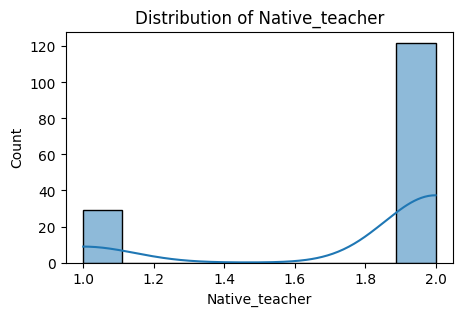

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


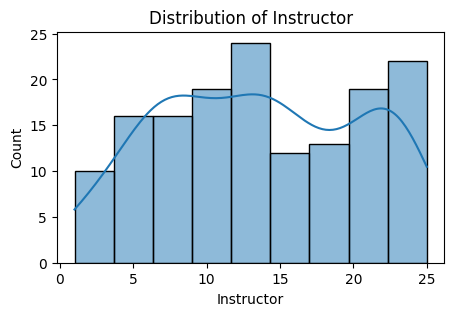

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


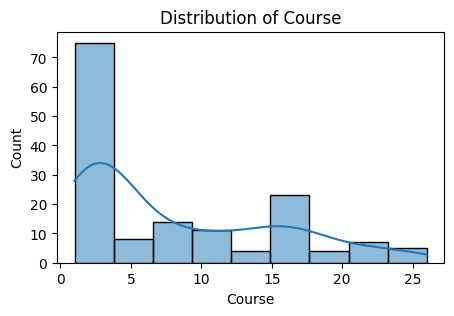

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


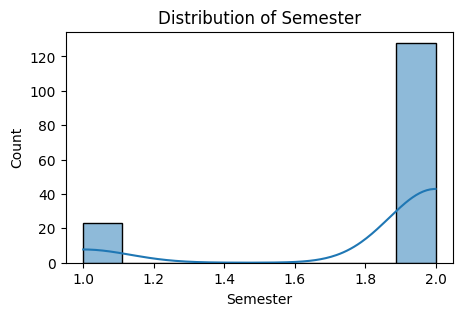

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


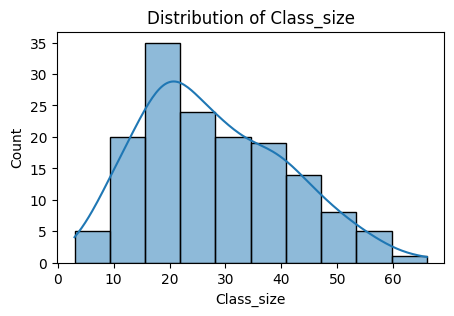

In [32]:
# Select the 5 features
features = ['Native_teacher', 'Instructor', 'Course', 'Semester', 'Class_size']

# 1. Calculate skewness
skewness = data[features].skew()
print("Skewness of Dataset Features:\n")
print(skewness)

# 2. Visualize distribution for each feature
for col in features:
    plt.figure(figsize=(5,3))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


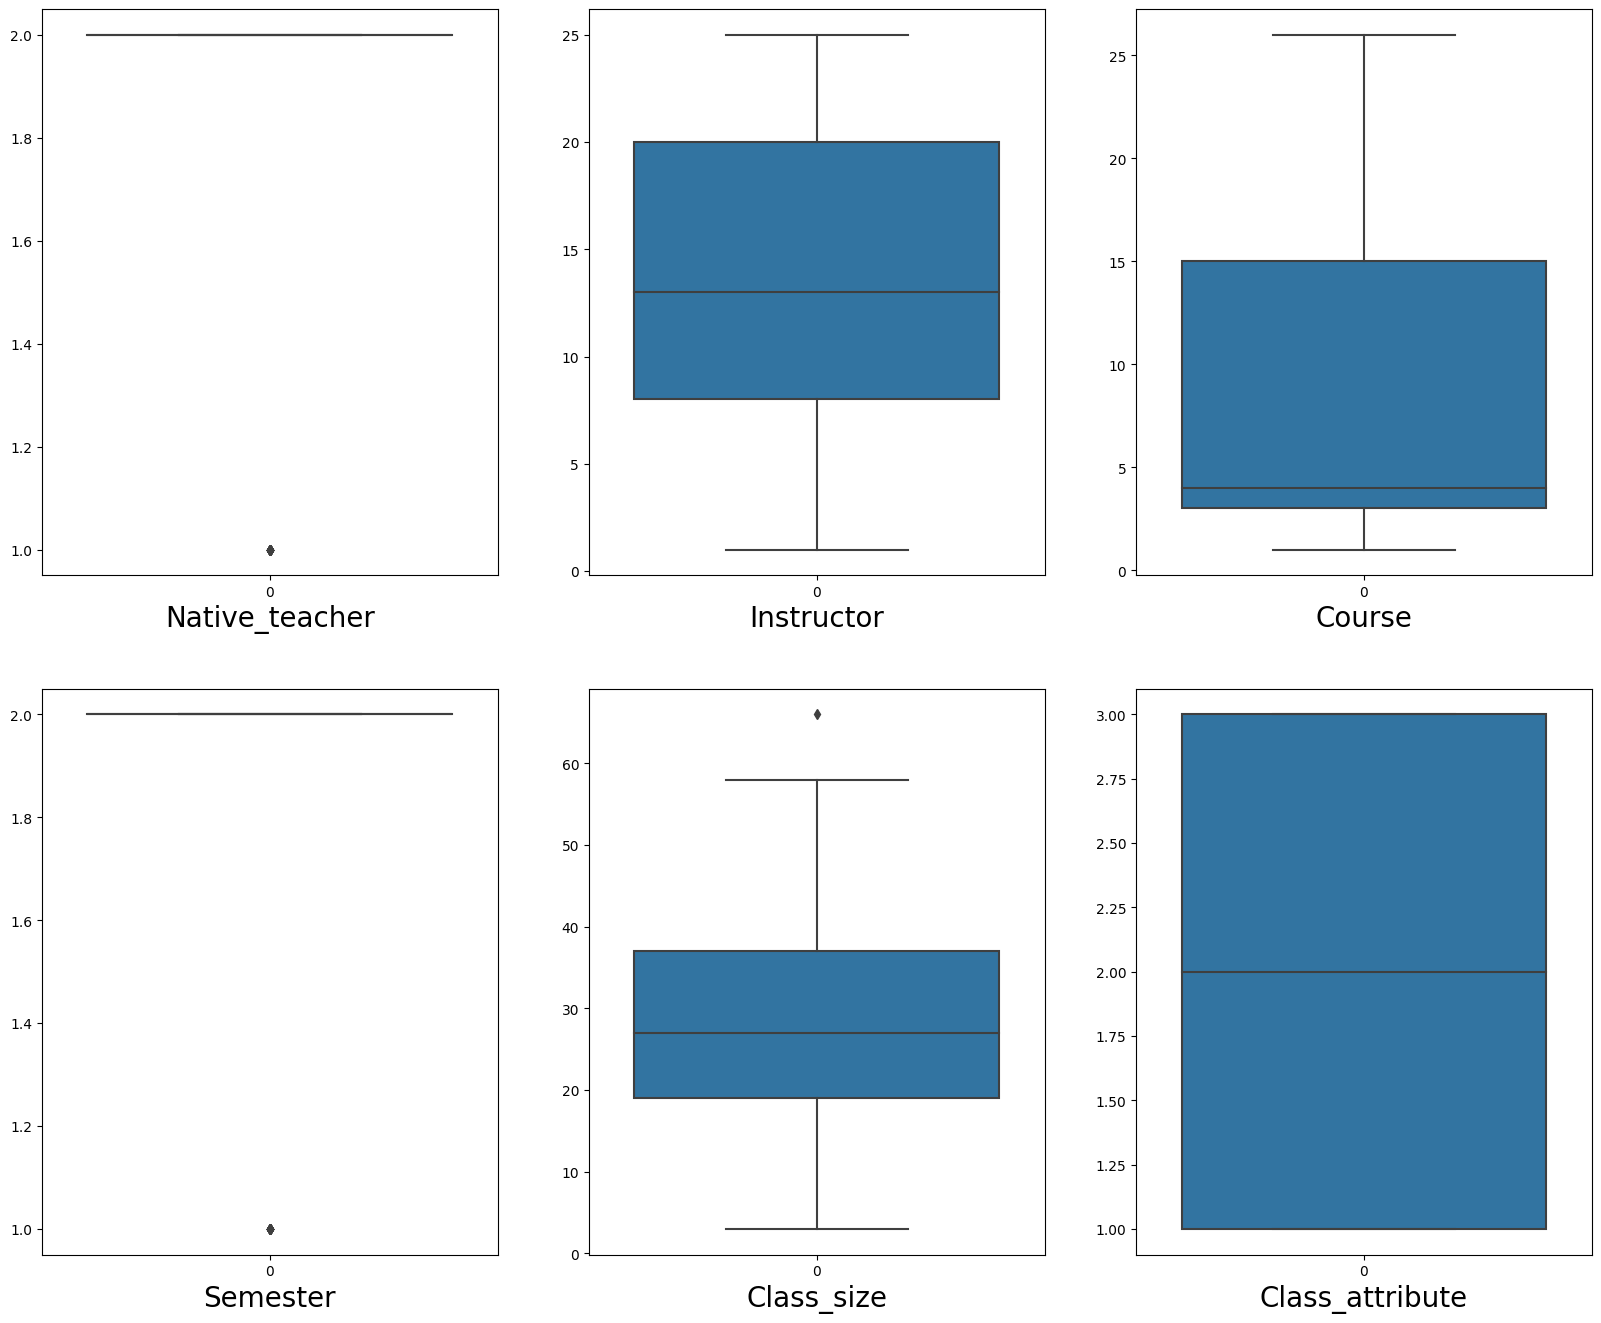

In [33]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

Based on the box plots it appears that there are no extreme or unusual values in the dataset there are no outliers present in the given dataset

### checking for the correlation

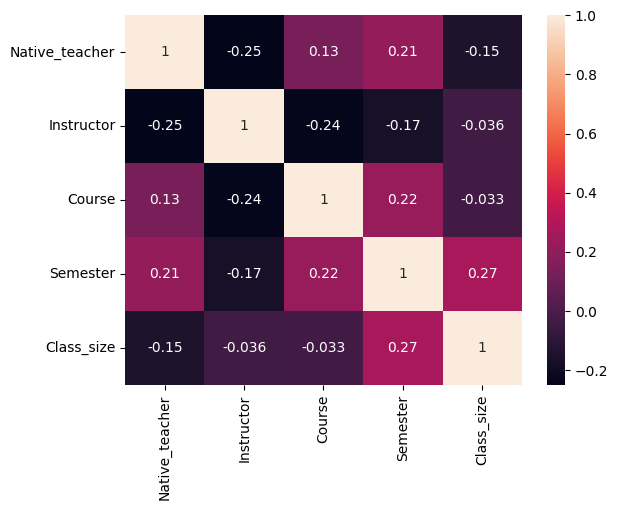

In [34]:
sns.heatmap(data.drop('Class_attribute',axis=1).corr(),annot=True)
plt.show()

The correlation heatmap shows that there are no strong linear relationships among the features. Most variables exhibit weak 
correlations, indicating low multicollinearity. The semester has a moderate positive correlationwith class size, suggesting 
that regular semesters generally have larger class sizes.Overall, the dataset is suitable for machine learning models without
the risk of redundancy among features.

### Label encoding 

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Native_teacher'] = le.fit_transform(data['Native_teacher'])
data['Semester'] = le.fit_transform(data['Semester'])
data['Class_attribute'] = le.fit_transform(data['Class_attribute'])

### One-Hot Encoding

1)Even though they are numeric IDs, instructor and course are categorical variables, so one-hot encoding is required to 
avoid false ordering assumptions.

2)One-hot encoding converts categorical features into binary variables so models don’t assume false numeric relationships.


In [36]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize encoder (FIXED)
encoder = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)

# Fit and transform
encoded_data = encoder.fit_transform(data[['Instructor', 'Course']])

# Convert to DataFrame
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(['Instructor', 'Course'])
)

# Combine with original data
data_final = pd.concat(
    [data.drop(['Instructor', 'Course'], axis=1), encoded_df],
    axis=1
)

# View result
data_final.head()


,Native_teacher,Semester,Class_size,Class_attribute,Instructor_2,Instructor_3,Instructor_4,Instructor_5,Instructor_6,Instructor_7,...,Course_17,Course_18,Course_19,Course_20,Course_21,Course_22,Course_23,Course_24,Course_25,Course_26
0,0,0,19,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,17,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,49,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,33,2,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,55,2,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Native_teacher ---> 0 represents native English speakers and 1 represents non-native speakers
#Semester ---> where 0 indicates Summer and 1 indicates Regular semester.
#Class_attribute is the target variable encoded as 0 for Low, 1 for Medium, and 2 for High performance.

In [38]:
data_final


,Native_teacher,Semester,Class_size,Class_attribute,Instructor_2,Instructor_3,Instructor_4,Instructor_5,Instructor_6,Instructor_7,...,Course_17,Course_18,Course_19,Course_20,Course_21,Course_22,Course_23,Course_24,Course_25,Course_26
0,0,0,19,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,17,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,49,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,33,2,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,55,2,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,1,26,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,1,1,12,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0,1,48,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,1,1,51,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Task-2 MODEL COMPARISION

### Splitting the data into x train and y train

In [39]:
#Step 1 Independent and dependent variable creation
X = data_final.drop('Class_attribute', axis=1)  # Features
y = data_final['Class_attribute']               # Target

In [40]:
X

,Native_teacher,Semester,Class_size,Instructor_2,Instructor_3,Instructor_4,Instructor_5,Instructor_6,Instructor_7,Instructor_8,...,Course_17,Course_18,Course_19,Course_20,Course_21,Course_22,Course_23,Course_24,Course_25,Course_26
0,0,0,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,55,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,1,26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,1,1,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0,1,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,1,1,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
y

0      2
1      2
2      2
3      2
4      2
      ..
146    0
147    0
148    0
149    0
150    0
Name: Class_attribute, Length: 151, dtype: int64

In [42]:
# Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train

,Native_teacher,Semester,Class_size,Instructor_2,Instructor_3,Instructor_4,Instructor_5,Instructor_6,Instructor_7,Instructor_8,...,Course_17,Course_18,Course_19,Course_20,Course_21,Course_22,Course_23,Course_24,Course_25,Course_26
15,1,1,43,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0,1,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1,1,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,1,1,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,1,1,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,1,1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1,1,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,1,1,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
y_train

15     1
125    2
11     2
127    2
51     2
      ..
71     0
106    1
14     1
92     2
102    1
Name: Class_attribute, Length: 120, dtype: int64

In [45]:
X_test

,Native_teacher,Semester,Class_size,Instructor_2,Instructor_3,Instructor_4,Instructor_5,Instructor_6,Instructor_7,Instructor_8,...,Course_17,Course_18,Course_19,Course_20,Course_21,Course_22,Course_23,Course_24,Course_25,Course_26
76,1,1,48,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1,0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,1,0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,1,1,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,1,1,37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,1,1,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0,0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,1,1,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,1,1,10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,1,0,20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y_test

76     0
18     1
82     2
81     2
143    0
31     0
78     2
64     1
55     1
85     2
45     2
12     2
36     0
9      2
19     1
137    1
114    0
146    0
56     1
133    1
29     0
84     2
26     1
132    1
124    2
142    0
111    0
67     0
98     1
30     0
22     1
Name: Class_attribute, dtype: int64

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## CREATING MODEL 

### 1.Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression #import class logistic regression
clf=LogisticRegression()  # make object of class 
clf.fit(X_train,y_train)  ## training

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
## Prediction
y_pred=clf.predict(X_test)
print(y_pred)

[0 1 1 2 0 0 2 1 1 1 2 2 0 2 1 1 0 0 0 0 1 2 0 0 0 0 1 0 2 0 0]


### Logistic Regression Model Evaluation

In [50]:
# importing metrics for model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score, recall_score, precision_score

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6451612903225806


In [52]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.56      0.45      0.50        11
           2       0.86      0.67      0.75         9

    accuracy                           0.65        31
   macro avg       0.67      0.65      0.65        31
weighted avg       0.66      0.65      0.64        31



### 2.Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred

array([0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 2, 0, 1], dtype=int64)

### Decision Tree Classifier Model evaluation

In [54]:
print("Accuracy:", accuracy_score(y_test, dt_pred))

Accuracy: 0.7096774193548387


In [55]:
print("\nClassification Report:\n", classification_report(y_test, dt_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.64      0.64      0.64        11
           2       0.83      0.56      0.67         9

    accuracy                           0.71        31
   macro avg       0.73      0.70      0.70        31
weighted avg       0.72      0.71      0.70        31



### 3.Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(rf_pred)

[0 1 1 0 0 0 1 1 1 1 2 2 0 2 1 0 0 1 1 1 0 2 1 1 0 0 0 0 0 0 1]


### Random Forest Classifier Model Evaluation

In [58]:
print("Accuracy:", accuracy_score(y_test, rf_pred))

Accuracy: 0.7419354838709677


In [59]:
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.69      0.82      0.75        11
           2       1.00      0.44      0.62         9

    accuracy                           0.74        31
   macro avg       0.80      0.72      0.72        31
weighted avg       0.79      0.74      0.73        31



### 4.SVM

In [60]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print(svm_pred)

[0 2 2 2 0 0 2 1 1 1 2 2 0 2 1 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 1]


### SVM Model Evaluation

In [61]:
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Accuracy: 0.7419354838709677

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.69      0.82      0.75        11
           2       1.00      0.44      0.62         9

    accuracy                           0.74        31
   macro avg       0.80      0.72      0.72        31
weighted avg       0.79      0.74      0.73        31



### 5.Gradient Boosting Classifier 

In [62]:
#  Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

# Train best model
best_gb = grid.best_estimator_
print(best_gb)

# Predict
gb_pred = best_gb.predict(X_test)
print(gb_pred)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=200,
                           random_state=42)
[0 1 1 2 0 0 2 1 1 1 2 2 0 2 1 1 0 1 1 1 0 1 1 0 0 0 0 0 2 0 1]


In [63]:
models = {
    "Logistic Regression": y_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    " GradientBoosting":gb_pred
}

for name, pred in models.items():
    print(name)
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print("-"*50)


Logistic Regression
Accuracy: 0.6451612903225806
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.56      0.45      0.50        11
           2       0.86      0.67      0.75         9

    accuracy                           0.65        31
   macro avg       0.67      0.65      0.65        31
weighted avg       0.66      0.65      0.64        31

--------------------------------------------------
Decision Tree
Accuracy: 0.7096774193548387
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.64      0.64      0.64        11
           2       0.83      0.56      0.67         9

    accuracy                           0.71        31
   macro avg       0.73      0.70      0.70        31
weighted avg       0.72      0.71      0.70        31

--------------------------------------------------
Random Forest
Accuracy: 0.7419354838709677
 

1.Logistic Regression:
Logistic Regression achieved an accuracy of 64.5%, serving as a baseline model. It performed reasonably well in predicting 
Low-performing TAs (high recall of 0.82), but struggled with the Medium class (recall of 0.45). This is mainly because Logistic
Regression assumes a linear relationship between features and the target, which is insufficient for capturing the complex
patterns present in teaching performance data.

2.Decision Tree:
The Decision Tree model improved accuracy to 70.9%. It showed strong performance for the Low category with a recall of 0.91,
indicating effective rule-based splitting. However, it performed moderately for Medium and High classes. While Decision Trees 
can capture non-linear relationships, they are prone to overfitting, which limits their generalization capability.

3.Random Forest:
Random Forest further improved accuracy to 74.2% by combining multiple decision trees. It achieved excellent precision for the
High category (1.00), meaning all predicted high-performing TAs were correct. However, its recall for the same class was 
lower (0.44), indicating that some high-performing TAs were misclassified. This shows that Random Forest is strong but can still
miss minority class patterns.

4.Support Vector Machine (SVM):
SVM obtained an accuracy of 64.5%, similar to Logistic Regression. It performed well for the High category (F1-score of 0.82)
but poorly for the Medium category. SVM requires careful kernel and parameter tuning, and without extensive tuning, it struggled
to separate overlapping class boundaries in this dataset.

5.Gradient Boosting:
Gradient Boosting achieved the highest accuracy of 77.4%, along with the best macro and weighted F1-scores (0.76 and 0.77). 
It showed balanced performance across all three classes by focusing on correcting errors made by previous models. This iterative
learning process allows Gradient Boosting to capture complex, non-linear relationships effectively, making it the most reliable
and robust model for this dataset.

## Best Model Recommendation

Gradient Boosting is recommended for deployment in production environments due to its superior overall accuracy, 
balanced performance across classes, proficiency in managing mixed feature types, robustness against skewed data and 
small datasets, and its effective reduction of bias and variance.

### Challenges Faced

### challenge-1 
The column names where not founded.

Step to solve the challenge
    --> adding column names to rows and understanding the attribute information  are the challenges that must be solved.


### challenge -2 
1)instructor values are categorical
    --> Since the original dataset does NOT provide real instructor names.
    --> It only contains 26 categorical course instructor IDs.
    
Step to solve the challenge
    --> instructor IDs are best for ML model prediction.
    --> For Presentation/ report we can use dummy names.

2)course values are categorical 
    --> Since the original dataset does not provide real course names. 
    --> It only contains 26 categorical course IDs.
    
Step to solve the challenge
    --> course IDs is best for ML model prediction.
    --> For Presentation/ report we can use generic course titles and clearly mention they are representative.

### Project Risks

1)Small Dataset Size:
The dataset contains only 151 records, which increases the risk of overfitting and limits the model’s ability to generalize well
to unseen data. Models may perform well on test data but may not scale effectively to real-world scenarios.

2)High Cardinality Categorical Features:
Features such as Instructor and Course have many unique categories. After encoding, this can lead to high-dimensional data, 
increasing model complexity and the risk of overfitting.

3)Limited Feature Information:
The dataset includes only a few attributes and does not capture other important factors such as teaching experience, 
student background, or assessment difficulty. This limits the model’s ability to fully explain performance outcomes.

4)Overfitting Risk:
Tree-based models easily overfit on small datasets. It can be solved by performing hyperparameter tuning and controlling tree depth and learning rate. It prevents the model from memorising training data.

5)Generalization Risk:
The data comes from a single department and institution, which may limit applicability to other universities or domains.

6)Overlapping Class Distributions:
Low, medium, and high performance classes show significant overlap across features, making clear separation difficult. Use non-linear models and evaluate performance using the F1 score and confusion matrix instead of relying only on accuracy.